# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

### Question 1:
### Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


=== Normality tests for QQQ 2020 ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 2.3345
  15.0% critical value: 0.5620
  10.0% critical value: 0.6400
  5.0% critical value: 0.7670
  2.5% critical value: 0.8950
  1.0% critical value: 1.0650
Kolmogorov-Smirnov p-value: 0.0214


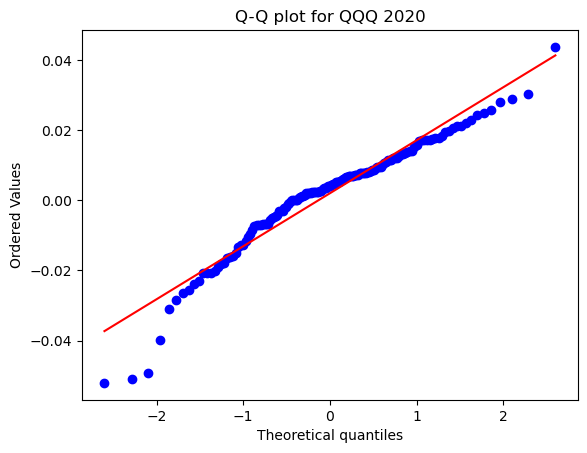


=== Normality tests for QQQ 2021 ===
Shapiro-Wilk p-value: 0.0027
Anderson-Darling stat: 1.4072
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.2973


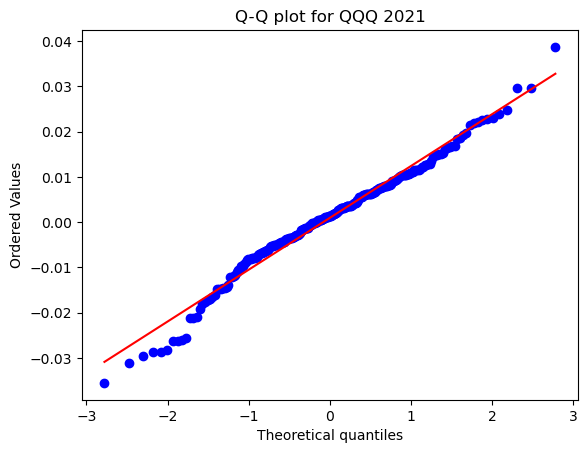


=== Normality tests for QQQ 2022 ===
Shapiro-Wilk p-value: 0.5611
Anderson-Darling stat: 0.3169
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.7460


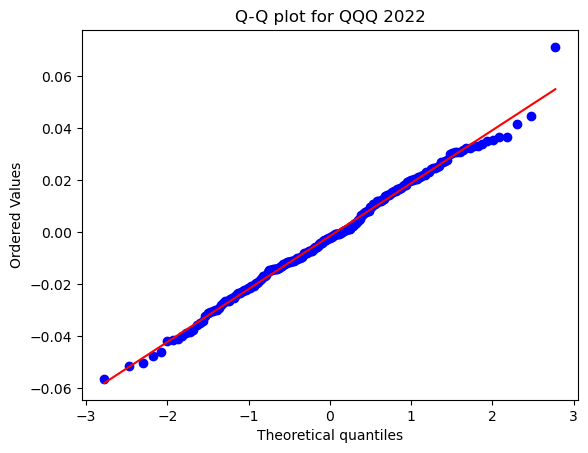


=== Normality tests for QQQ 2023 ===
Shapiro-Wilk p-value: 0.2229
Anderson-Darling stat: 0.4933
  15.0% critical value: 0.5560
  10.0% critical value: 0.6330
  5.0% critical value: 0.7590
  2.5% critical value: 0.8860
  1.0% critical value: 1.0540
Kolmogorov-Smirnov p-value: 0.8857


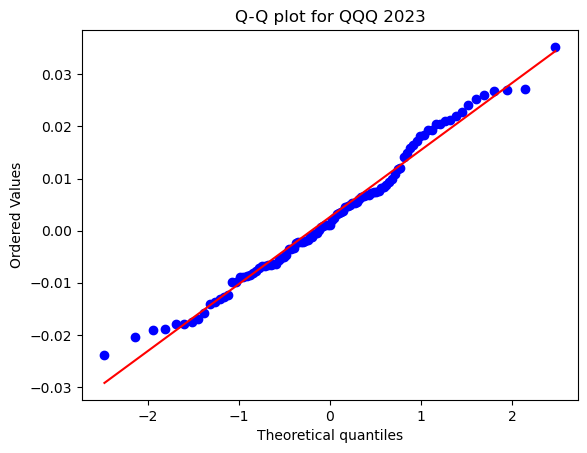

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats

tickers = ['QQQ']
data = yf.download(tickers, start='2020-06-01', end='2023-06-01')['Close']

log_returns = np.log(data / data.shift(1)).dropna()
log_returns['Year'] = log_returns.index.year

def test_normality(series, name):
    print(f"\n=== Normality tests for {name} ===")
    shapiro_stat, shapiro_p = stats.shapiro(series)
    print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")
    
    anderson = stats.anderson(series, dist='norm')
    print(f"Anderson-Darling stat: {anderson.statistic:.4f}")
    for cv, sig in zip(anderson.critical_values, anderson.significance_level):
        print(f"  {sig}% critical value: {cv:.4f}")
    
    ks_stat, ks_p = stats.kstest(series, 'norm', args=(series.mean(), series.std()))
    print(f"Kolmogorov-Smirnov p-value: {ks_p:.4f}")
    
    # Q-Q plot
    plt.figure()
    stats.probplot(series, dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {name}")
    plt.show()

for ticker in tickers:
    for year in sorted(log_returns['Year'].unique()):
        subset = log_returns.loc[log_returns['Year'] == year, ticker]
        if len(subset) > 10:  # Ensure enough data points
            test_normality(subset, f"{ticker} {year}")

To explore this question, I decided to iteratively look through the past five years of the NASDAQ-100, and see which years were normal and which were not based on the normality tests.
1) In years 2022 and 2023, it is observed that the NASDAQ-100, the tests provided indicate there is no evidence to reject normality among the log returns for these years.
2) However, the preceding years do have evidence to reject normality, as the Shapiro-Wilk p-value is less than a significance level of 0.05, Anderson-Darling stat is greater than the critical value, and the Kolmogorov-Smirnov p-valuye is less than 0.05 as well. 


### Part 2: 
### Test if removing extremal return data creates a distribution with evidence of being normal.
 


=== Normality tests for QQQ 2021 (raw) ===
Shapiro-Wilk p-value: 0.0027
Anderson-Darling stat: 1.4072
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.2973


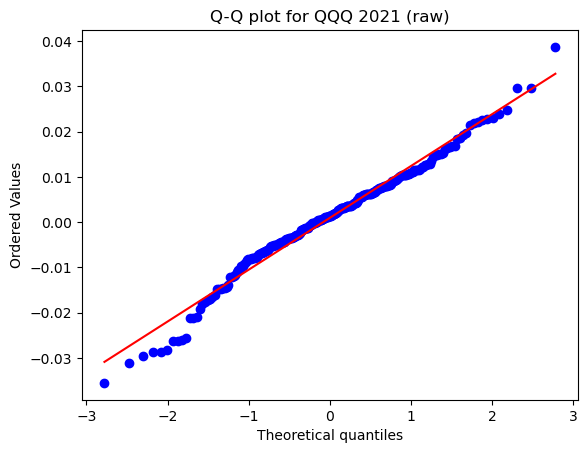


=== Normality tests for QQQ 2021 (trimmed 3% extremes) ===
Shapiro-Wilk p-value: 0.1656
Anderson-Darling stat: 0.4364
  15.0% critical value: 0.5670
  10.0% critical value: 0.6450
  5.0% critical value: 0.7740
  2.5% critical value: 0.9030
  1.0% critical value: 1.0740
Kolmogorov-Smirnov p-value: 0.9470


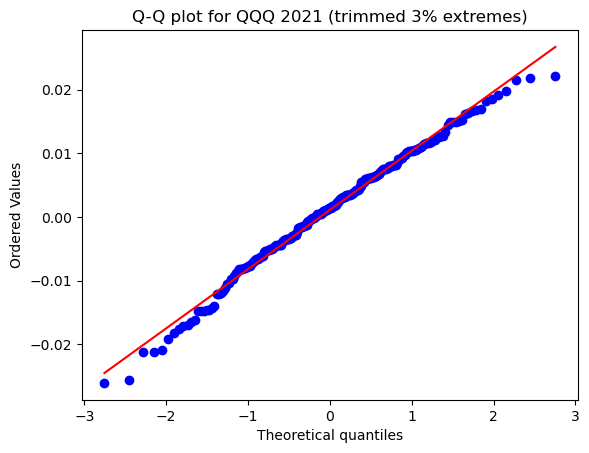

In [3]:
log_returns_2021 = log_returns[log_returns['Year'] == 2021]

for ticker in ['QQQ']:
    series_2021 = log_returns_2021[ticker]
    test_normality(series_2021, f"{ticker} 2021 (raw)")

def remove_extremes(series, percent=1):
    lower = np.percentile(series, percent)
    upper = np.percentile(series, 100 - percent)
    return series[(series >= lower) & (series <= upper)]

for ticker in ['QQQ']:
    series_2021 = log_returns_2021[ticker]
    clean_series = remove_extremes(series_2021, percent=3)
    test_normality(clean_series, f"{ticker} 2021 (trimmed 3% extremes)")

For part 2, I continued with using NASDAQ-100, but decided to pull one of the proven non normal years, 2021, from the tests conducted in part 1. I then trimmed the log returns starting at 1% then manually iterated through each percent until the extremal returns create a distribution that has evidence of being normal through the normality tests.

### Part 3: 
### Create a personalized portfolio of stocks with historical log return data that is normally distributed.

In [4]:
tickers = ['JNJ', 'PG', 'XOM', 'JPM', 'SPY']
data = yf.download(tickers, start='2024-06-01', end='2025-06-01')['Close']

person_log = np.log(data / data.shift(1)).dropna()

[*********************100%***********************]  5 of 5 completed



=== Normality tests for JNJ individual ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 2.4220
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.0564


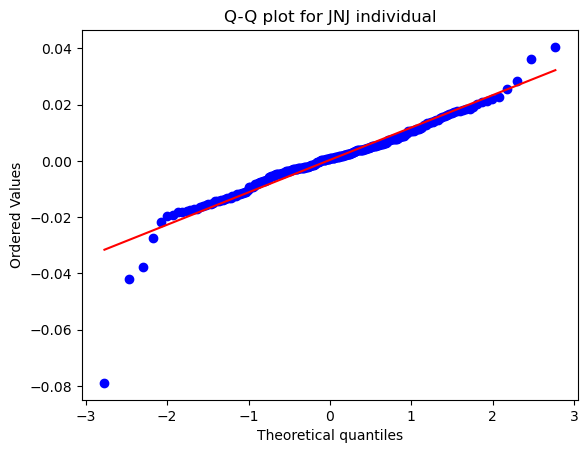


=== Normality tests for PG individual ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 2.4177
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.1163


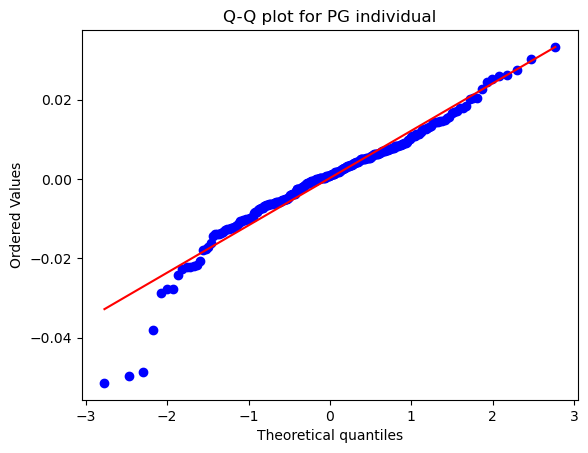


=== Normality tests for XOM individual ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 1.5330
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.2301


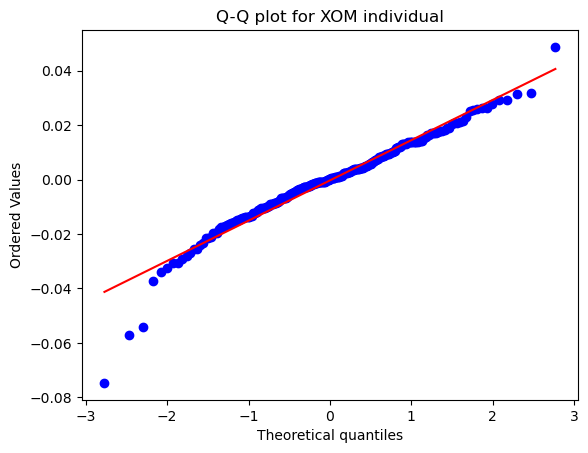


=== Normality tests for JPM individual ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 5.7159
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.0238


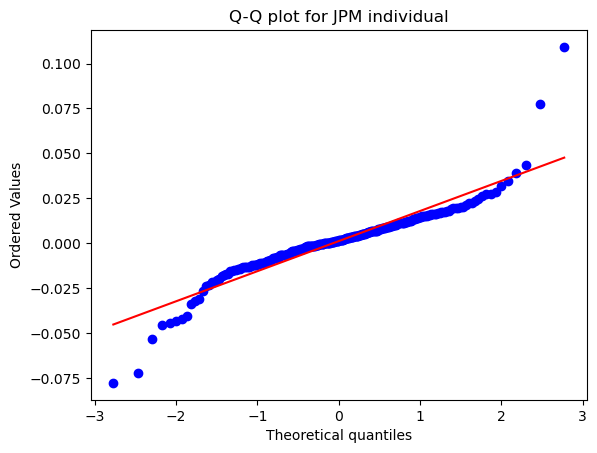


=== Normality tests for SPY individual ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 7.8763
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.0003


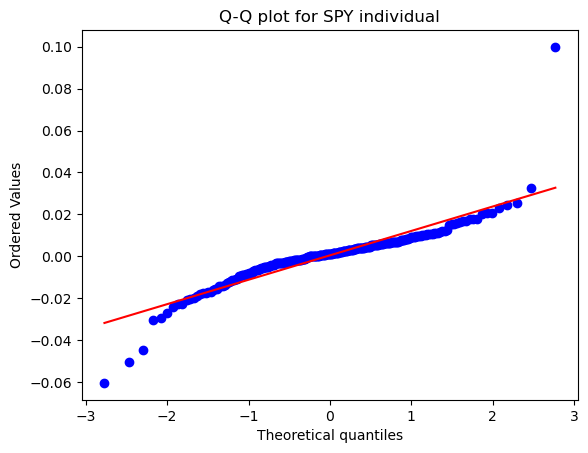

In [5]:
for ticker in tickers:
    test_normality(person_log[ticker], f"{ticker} individual")



=== Normality tests for Personalized  Portfolio (full period) ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 2.4250
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.1134


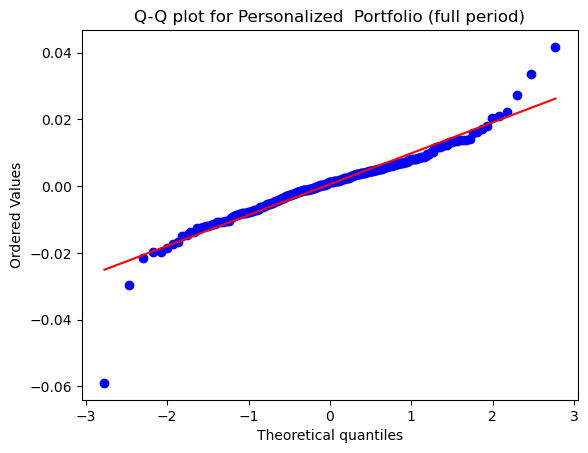

In [6]:
weights = np.array([0.35, 0.35, 0.2, 0.05, 0.05])
port_log = person_log.dot(weights)

test_normality(port_log, "Personalized  Portfolio (full period)")



=== Normality tests for Personalized  Portfolio (trimmed 1% extremes) ===
Shapiro-Wilk p-value: 0.6508
Anderson-Darling stat: 0.3966
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9030
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.8725


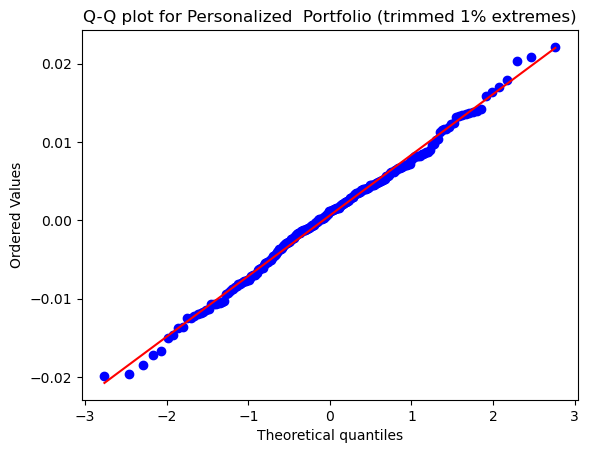

In [7]:
clean_portfolio = remove_extremes(port_log, percent=1)
test_normality(clean_portfolio, "Personalized  Portfolio (trimmed 1% extremes)")

blah blah

### Part 4: 
###  Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.

In [10]:

tickers = ['AAPL', 'META', 'TSLA', 'NVDA', 'MSTR', 'PLTR']
data = yf.download(tickers, start='2020-06-01', end='2025-06-01')['Close']

# Compute log returns
mini_log = np.log(data / data.shift(1)).dropna()
mini_log['Year'] = mini_log.index.year

# Define portfolios
low_risk_weights = np.array([0.35, 0.25, 0.10, 0.10, 0.10, 0.10])
high_risk_weights = np.array([0.10, 0.10, 0.35, 0.10, 0.10, 0.25])

# Compute portfolio log returns
low_port_log_ret = mini_log[tickers].dot(low_risk_weights)
high_port_log_ret = mini_log[tickers].dot(high_risk_weights)


[*********************100%***********************]  6 of 6 completed



=== Normality tests for Low-Risk Portfolio 2020 ===
Shapiro-Wilk p-value: 0.1535
Anderson-Darling stat: 0.4411
  15.0% critical value: 0.5450
  10.0% critical value: 0.6210
  5.0% critical value: 0.7450
  2.5% critical value: 0.8690
  1.0% critical value: 1.0340
Kolmogorov-Smirnov p-value: 0.8132


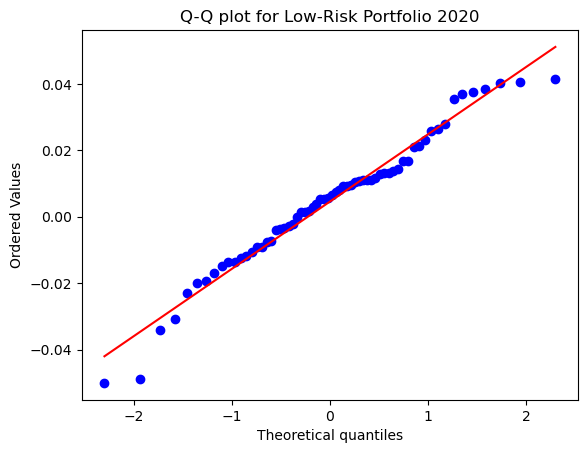


=== Normality tests for High-Risk Portfolio 2020 ===
Shapiro-Wilk p-value: 0.2622
Anderson-Darling stat: 0.5136
  15.0% critical value: 0.5450
  10.0% critical value: 0.6210
  5.0% critical value: 0.7450
  2.5% critical value: 0.8690
  1.0% critical value: 1.0340
Kolmogorov-Smirnov p-value: 0.6680


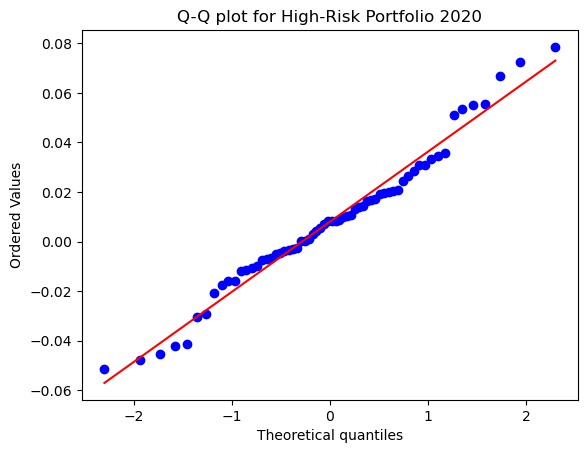


=== Normality tests for Low-Risk Portfolio 2021 ===
Shapiro-Wilk p-value: 0.0059
Anderson-Darling stat: 1.4715
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.0935


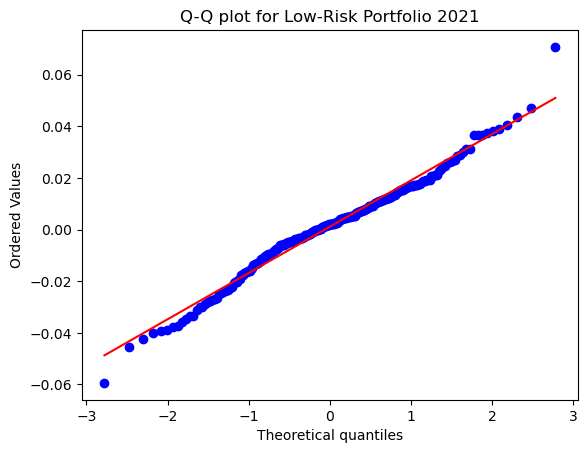


=== Normality tests for High-Risk Portfolio 2021 ===
Shapiro-Wilk p-value: 0.0002
Anderson-Darling stat: 1.8350
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.0910


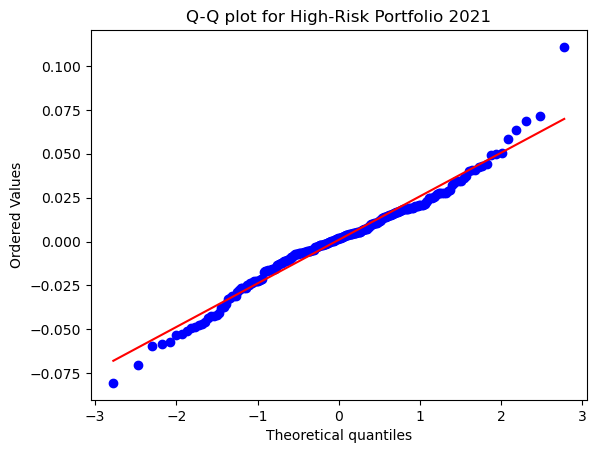


=== Normality tests for Low-Risk Portfolio 2022 ===
Shapiro-Wilk p-value: 0.2850
Anderson-Darling stat: 0.4247
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.7898


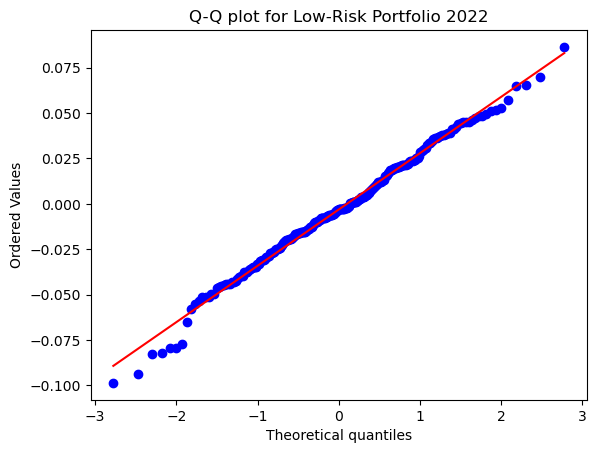


=== Normality tests for High-Risk Portfolio 2022 ===
Shapiro-Wilk p-value: 0.2983
Anderson-Darling stat: 0.3282
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.9099


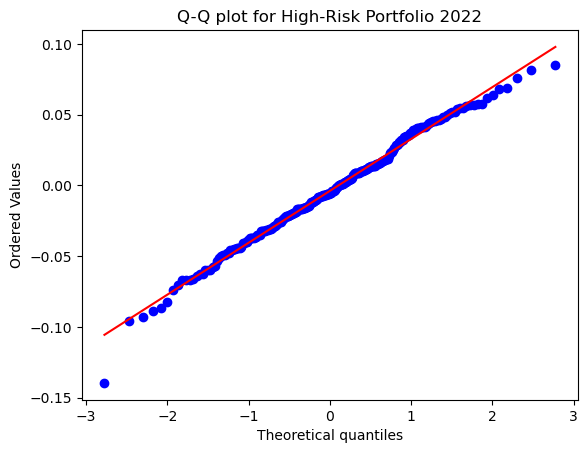


=== Normality tests for Low-Risk Portfolio 2023 ===
Shapiro-Wilk p-value: 0.0011
Anderson-Darling stat: 0.5422
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.6155


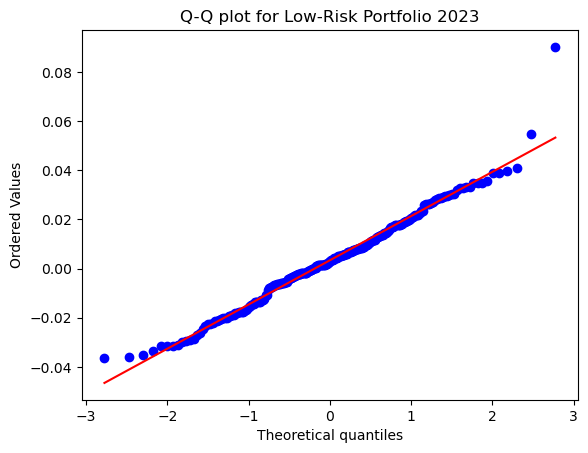


=== Normality tests for High-Risk Portfolio 2023 ===
Shapiro-Wilk p-value: 0.4076
Anderson-Darling stat: 0.3886
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.6249


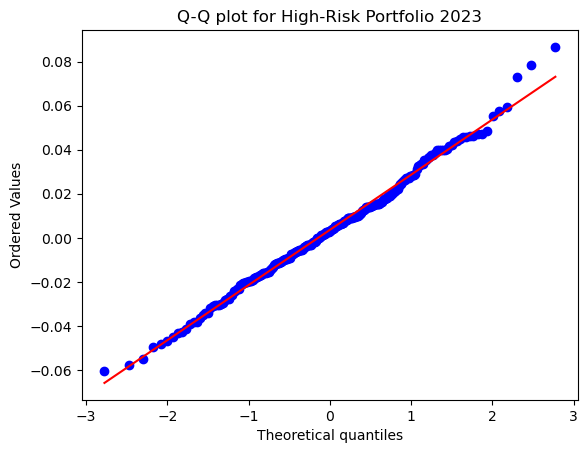


=== Normality tests for Low-Risk Portfolio 2024 ===
Shapiro-Wilk p-value: 0.2153
Anderson-Darling stat: 0.4536
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.6394


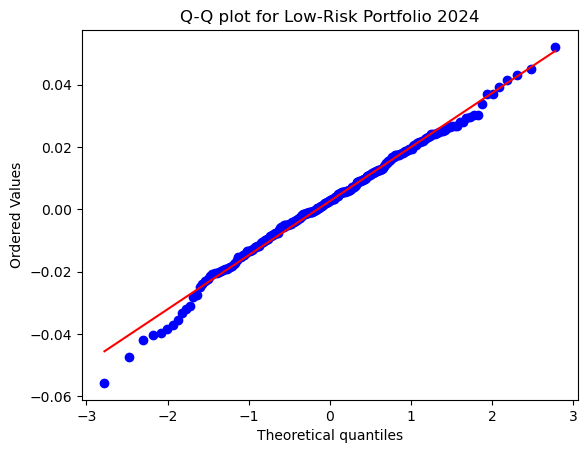


=== Normality tests for High-Risk Portfolio 2024 ===
Shapiro-Wilk p-value: 0.0408
Anderson-Darling stat: 0.5422
  15.0% critical value: 0.5670
  10.0% critical value: 0.6460
  5.0% critical value: 0.7750
  2.5% critical value: 0.9040
  1.0% critical value: 1.0750
Kolmogorov-Smirnov p-value: 0.8479


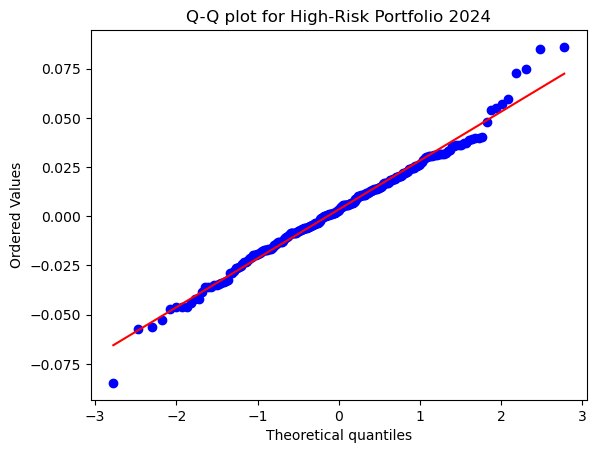


=== Normality tests for Low-Risk Portfolio 2025 ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 1.5076
  15.0% critical value: 0.5560
  10.0% critical value: 0.6330
  5.0% critical value: 0.7590
  2.5% critical value: 0.8850
  1.0% critical value: 1.0530
Kolmogorov-Smirnov p-value: 0.2858


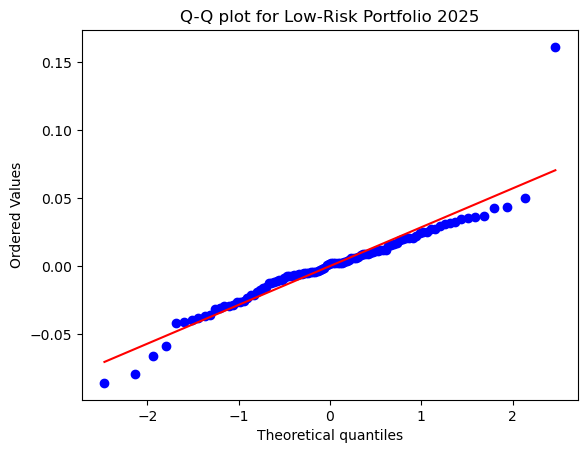


=== Normality tests for High-Risk Portfolio 2025 ===
Shapiro-Wilk p-value: 0.0004
Anderson-Darling stat: 0.6795
  15.0% critical value: 0.5560
  10.0% critical value: 0.6330
  5.0% critical value: 0.7590
  2.5% critical value: 0.8850
  1.0% critical value: 1.0530
Kolmogorov-Smirnov p-value: 0.4019


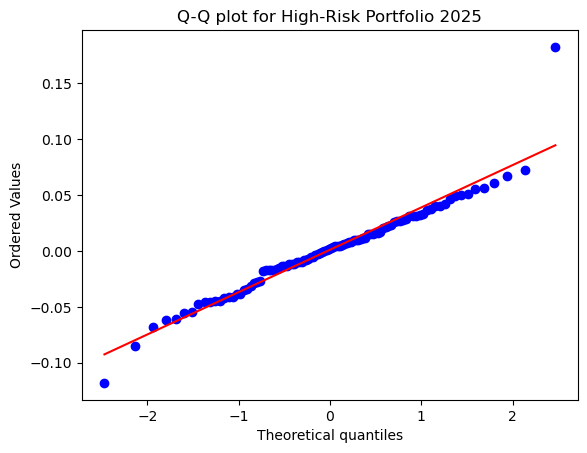

In [ ]:
for year in sorted(mini_log['Year'].unique()):
    subset_low = low_port_log_ret[mini_log['Year'] == year]
    subset_high = high_port_log_ret[mini_log['Year'] == year]
    
    if len(subset_low) > 10:
        test_normality(subset_low, f"Low-Risk Portfolio {year}")
    if len(subset_high) > 10:
        test_normality(subset_high, f"High-Risk Portfolio {year}")


 Here I tested whether the log returns of the low-risk and high-risk portfolios from Mini Project 1 followed a normal distribution across different years. We found that in 2020, 2022, 2023, and 2024, the portfolios exhibited strong evidence of normality. This was supported by Shapiro-Wilk p-values generally above 0.05 - but if not, the Anderson-Darling statistics below critical values at the 5% level, supportive Q-Q plots, and the Kolmogorov-Smirnov p-value above 0.05 suggested normality. These results suggest that during these periods, the portfolios' daily log returns were consistent with the normal distribution assumptions.

### Part 5:
### Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

[*********************100%***********************]  5 of 5 completed


=== Normality tests for JNJ 10 years ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 39.1949
  15.0% critical value: 0.5750
  10.0% critical value: 0.6550
  5.0% critical value: 0.7860
  2.5% critical value: 0.9170
  1.0% critical value: 1.0900
Kolmogorov-Smirnov p-value: 0.0000


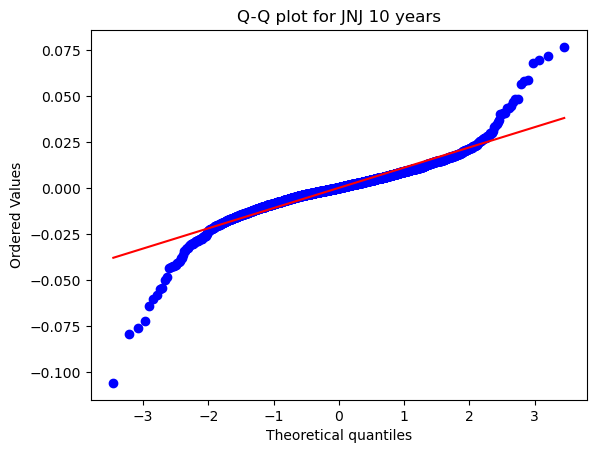


=== Normality tests for PG 10 years ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 41.1165
  15.0% critical value: 0.5750
  10.0% critical value: 0.6550
  5.0% critical value: 0.7860
  2.5% critical value: 0.9170
  1.0% critical value: 1.0900
Kolmogorov-Smirnov p-value: 0.0000


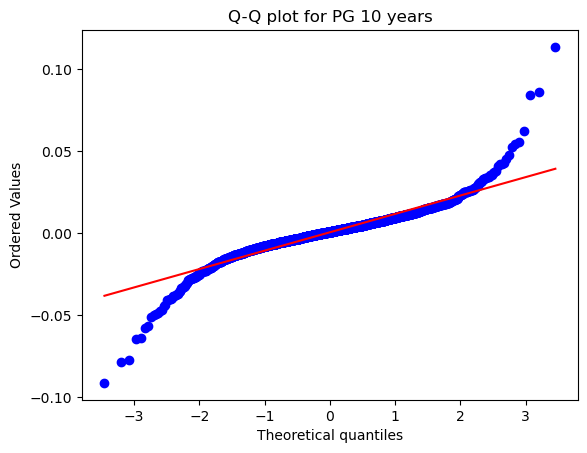


=== Normality tests for XOM 10 years ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 28.9704
  15.0% critical value: 0.5750
  10.0% critical value: 0.6550
  5.0% critical value: 0.7860
  2.5% critical value: 0.9170
  1.0% critical value: 1.0900
Kolmogorov-Smirnov p-value: 0.0000


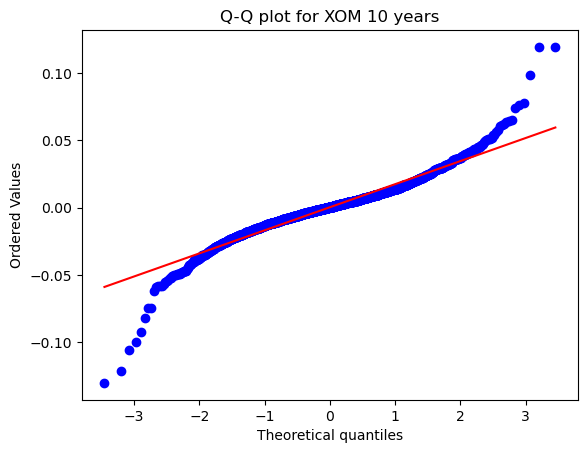


=== Normality tests for JPM 10 years ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 45.4498
  15.0% critical value: 0.5750
  10.0% critical value: 0.6550
  5.0% critical value: 0.7860
  2.5% critical value: 0.9170
  1.0% critical value: 1.0900
Kolmogorov-Smirnov p-value: 0.0000


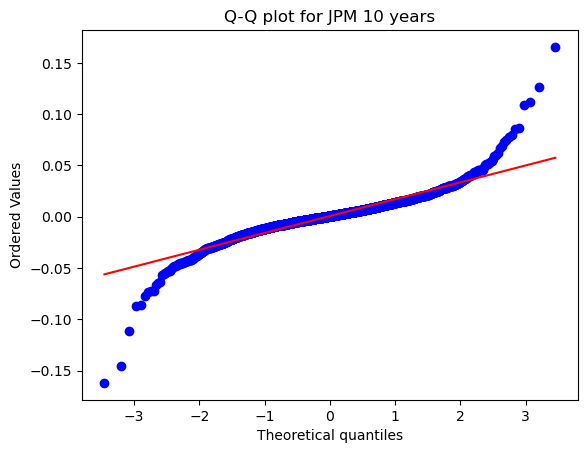


=== Normality tests for SPY 10 years ===
Shapiro-Wilk p-value: 0.0000
Anderson-Darling stat: 55.7950
  15.0% critical value: 0.5750
  10.0% critical value: 0.6550
  5.0% critical value: 0.7860
  2.5% critical value: 0.9170
  1.0% critical value: 1.0900
Kolmogorov-Smirnov p-value: 0.0000


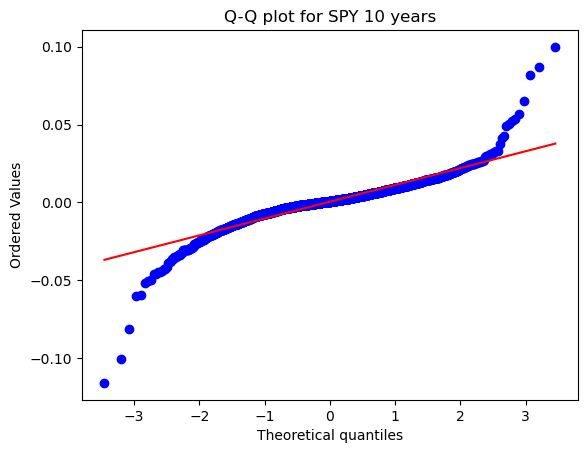

In [14]:
tickers = ['JNJ', 'PG', 'XOM', 'JPM', 'SPY']
data = yf.download(tickers, start='2015-06-01', end='2025-06-01')['Close']

x_ret = np.log(data / data.shift(1)).dropna()

for ticker in tickers:
    test_normality(x_ret[ticker], f"{ticker} 10 years")

After applying the normality tests to JNJ, PG, XOM, JPM, and SPY, I found that none of the stocks showed evidence of normally distributed log returns over the 10-year period. It is evident visually as well, as all the QQ-plots have strong tails on both ends, exhibiting kurtosis and skewness, which is expected by for financial return data. An explanation for these deviations is that over long time horizons, extreme events and outliers contribute to deviations from the normal distribution.